In [1]:
!wget https://bit.ly/fruits_300_data -o fruits_300.npy

'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [8]:
import pandas as pd
import numpy as np

fruits = np.load('fruits_300.npy')
fruits2 = fruits.reshape(-1, 100*100)
fruits2.shape

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [10]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)

km.fit(fruits2)

print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [11]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([111,  98,  91], dtype=int64))


In [17]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)

    rows = int(np.ceil(n/10))

    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n :
                axs[i, j].imshow(arr[i*10 + j], cmap='gray')
            axs[i, j].axis('off')
    plt.show()

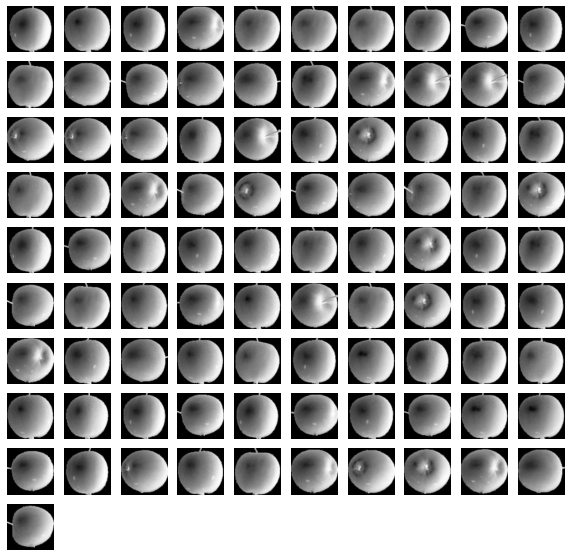

In [20]:
draw_fruits((fruits[km.labels_ == 2]))

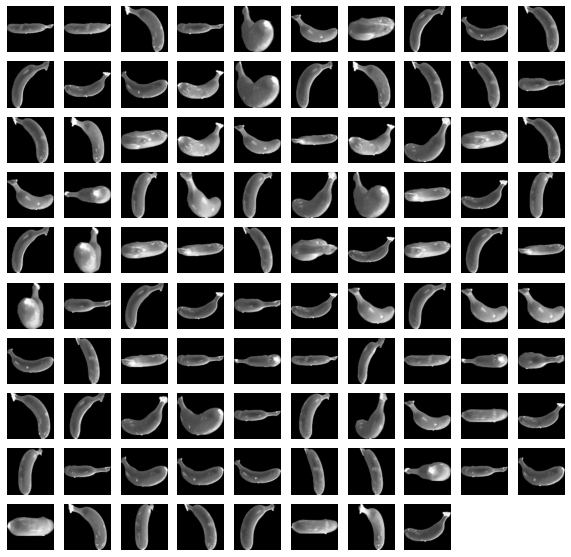

In [21]:
draw_fruits((fruits[km.labels_ == 1]))

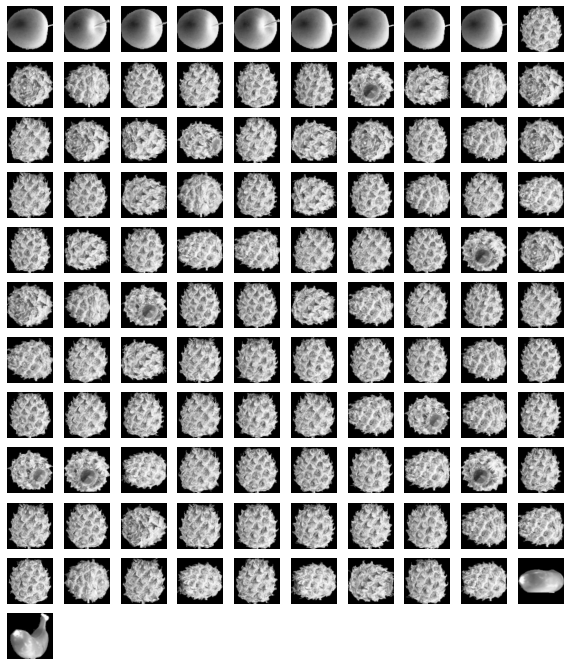

In [22]:
draw_fruits((fruits[km.labels_ == 0]))

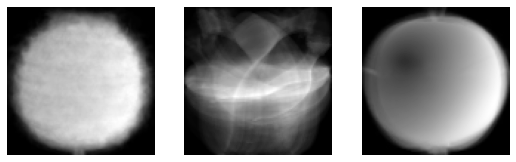

In [23]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [24]:
print(km.transform(fruits2[100:101]))

[[3393.8136117  8837.37750892 5267.70439881]]


In [29]:
print(km.predict(fruits2[100:101]))

[0]


TypeError: Invalid shape (10000,) for image data

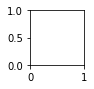

In [33]:
draw_fruits((fruits2[100:101]))

In [34]:
print(km.n_iter_)

4


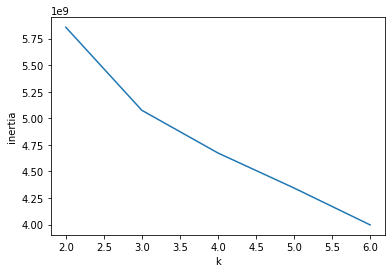

In [36]:
inertia = []
for k in range(2, 7) :
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits2)
    inertia.append(km.inertia_)

plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()